<a href="https://colab.research.google.com/github/RoetGer/applied-causality-booklet/blob/main/causality_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Causality in Data Science

---



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from graphviz import Digraph

plt.rc('figure', figsize=(15, 10))
plt.rc('font', size=16);

## Association vs Causality

A first important milestone in understanding on how causality affects us as data scientists is to acknowledge the difference between association and causality. Or to put it more concisely: "Correlation does not imply causation".

Let's look at some data:

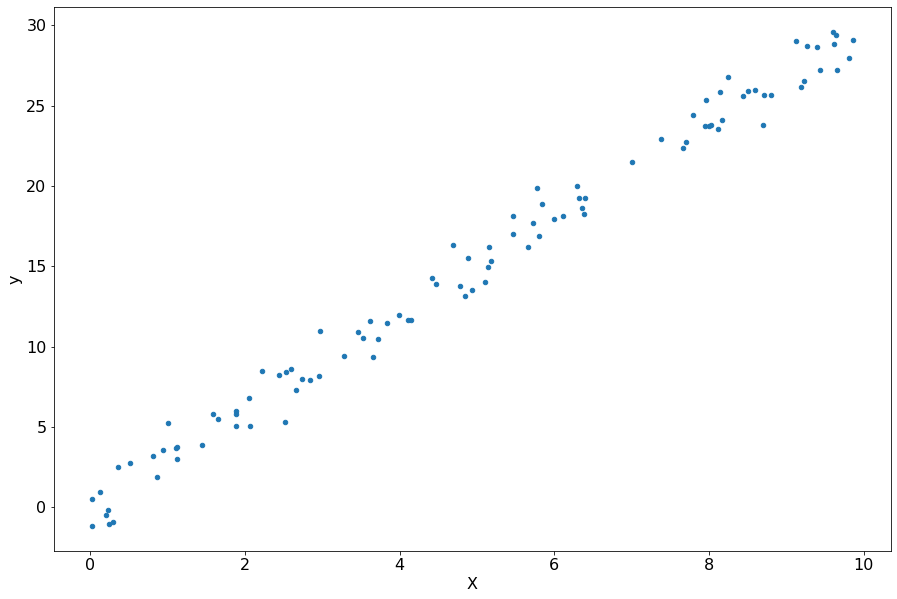

In [3]:
def get_data(effect_size, seed=5):
  np.random.seed(seed)

  x = np.random.uniform(high=10., size=100)
  y = effect_size*x + np.random.normal(size=100)

  return pd.DataFrame({
      'X': x,
      'y': y
  })

data = get_data(effect_size=3.)
data.plot.scatter('X', 'y');

In [6]:
mdl = sm.OLS(endog=data.y, exog=data.X).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.770e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):                   5.11e-123
Time:                        21:21:54   Log-Likelihood:                         -145.55
No. Observations:                 100   AIC:                                      293.1
Df Residuals:                      99   BIC:                                      295.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              3.0030      0.018    166.431      0.000       2.967       3.039
==============================================================================
Omnibus:                        0.710   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.701   Jarque-Bera (JB):                0.829
Skew:                           0.125   Prob(JB):                        0.661
Kurtosis:                       2.630   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the sampled dataset it is easy to recover a relationship between X and y. However, we implicitly assumed that y depends on X, although this was not stated anywhere, we could have also regressed X on y, i.e.:

In [7]:
mdl = sm.OLS(endog=data.X, exog=data.y).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      X   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.770e+04
Date:                Sun, 25 Apr 2021   Prob (F-statistic):                   5.11e-123
Time:                        21:22:36   Log-Likelihood:                         -35.411
No. Observations:                 100   AIC:                                      72.82
Df Residuals:                      99   BIC:                                      75.43
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3318      0.002    166.431      0.000       0.328       0.336
==============================================================================
Omnibus:                        0.719   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.698   Jarque-Bera (JB):                0.837
Skew:                          -0.126   Prob(JB):                        0.658
Kurtosis:                       2.629   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the get_data function, the first approach is the correct one (we simply multiply X by 3 and then add some noise). However, the data alone cannot tell us which direction is the proper one. Without any assumptions/knowledge about the underlying causal structure, we can only talk about associations, which in case of the linear regression are basically conditional expectations, i.e. $\mathbb{E}[Y|X]$ and $\mathbb{E}[X|Y]$. This gives us the power to answer questions of the nature: "We have observed X, what do we expect to see for Y", e.g.:

* "A customer x has an income of 10.000 Euro, what would we expect this customer spends on leisure articles?"
* "We can see it rain, what is the chance that our driveway is wet?"
* "An applicant for a personal loan works as a teacher, what is the estimated probability that they will default"

In contrast, causality goes beyond merely observing what is happening and tries to infer the concrete impact of one variable onto another one. This would allow us to make statements about what would happen, if we set a variable to a certain value. In the notation developed by Pearl, we would use the do-operator and write: $\mathbb{E}[Y|\text{do}(X)]$ and $\mathbb{E}[X|\text{do}(Y)]$ to differentiate this setting from the classical one, where we just infer associative relationships.

Some questions we might be interested in and which tend to have a causal twist to them:

* "What was the concrete impact of calling the customer in their decision to purchase the service?"
* "If we turn on the sprinkler, what is the chance that the driveway gets wet?"
* "What would the result of my A/B test best, if everyone did what they were supposed to do?" 
* "Which variables do we have to measure in order for us to determine whether an advertisement campaign is worth its money?"




## Basic Building Blocks for Working with Causality

### A Graphical View

### Two Important Tools